# Problem Description

All the problems below are about when some snow gooses will come out to play on a particular day, depending on temperature, humidity, light and weather (cloud).  To simplify our problems, let’s just consider the time, which is the target we try to predict, to be in two classes: – (time with the “–” sign for some of the data items below) and + (otherwise).  That is, we want to predict if the gooses will come out early (–) or late (+) based on temperature, humidity, light and weather (cloud).  All the data before 1/11/88 are training examples and all data after that are testing examples.  We can ignore the two days with missing values (on 1/04/88 and 1/06/88).

### 0.1 Lest's take a look at data
Your first step is to perform an initial study (or inspection) of the given samples (not the test cases), which may include a brief analysis of the distribution of the samples over one attribute or other properties you think that are worthwhile to exam.


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Load the data
data = pd.read_csv('514_HW1_Data.csv')

# Drop missing values
data = data.dropna();
    
# Data Profile
print "Dataset has {} data points with {} variables each.".format(*data.shape)
data.head(n = 10)

Dataset has 36 data points with 6 variables each.


/Users/Chen/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/Chen/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/Chen/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/Chen/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the construct

,DATE,TIME,TEMP,HUM,LIGHT,CLOUD
0,11/10/87,11,11,78.0,12.6,100
1,11/13/87,2,11,88.0,10.8,80
2,11/14/87,-2,11,100.0,9.7,30
3,11/15/87,-11,20,83.0,12.2,50
4,11/17/87,-5,8,100.0,14.2,0
5,11/18/87,2,12,90.0,10.5,90
6,11/21/87,-6,6,87.0,12.5,30
7,11/22/87,22,18,82.0,12.9,20
8,11/23/87,22,19,91.0,12.3,80
9,11/25/87,21,21,92.0,9.4,100


### 0.2 Calculate some statistics

Statistics for dataset:

Minimum TIME: -29.00
Maximum TIME: 25.00
Mean TIME: -4.36
Median TIME -6.50
Standard deviation of TIME: 15.29


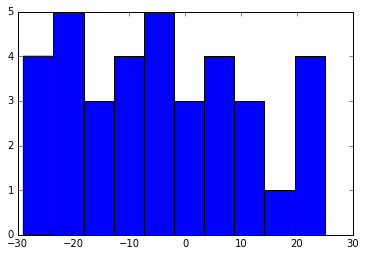

In [3]:
time = data['TIME']
minimum_time = np.min(time)
maximum_time = np.max(time)
mean_time = np.mean(time)
median_time = np.median(time)
std_time = np.std(time)
plt.hist(time)
# Show the calculated statistics
print "Statistics for dataset:\n"
print "Minimum TIME: {:,.2f}".format(minimum_time)
print "Maximum TIME: {:,.2f}".format(maximum_time)
print "Mean TIME: {:,.2f}".format(mean_time)
print "Median TIME {:,.2f}".format(median_time)
print "Standard deviation of TIME: {:,.2f}".format(std_time)

### 0.3. For simplicity, let's set classified data into +1 and -1

In [4]:
def convert(time):
    if time < 0:
        return -1;
    if time >0:
        return 1;

In [5]:
data['TIME'] = data['TIME'].apply(lambda x: convert(x))

In [6]:
data.head()

,DATE,TIME,TEMP,HUM,LIGHT,CLOUD
0,11/10/87,1,11,78.0,12.6,100
1,11/13/87,1,11,88.0,10.8,80
2,11/14/87,-1,11,100.0,9.7,30
3,11/15/87,-1,20,83.0,12.2,50
4,11/17/87,-1,8,100.0,14.2,0


### 0.4. Feature observation
* DATE: It is a categorical feature. Not included in the modeling
* TEMP: Temperature
* HUM: Humidity
* LIGHT: Light
* CLOUD: Weather
We already assume that time depends on temperature, humidity, light and weather(cloud), which make sense. 

### 0.5. Split data into training data and testing data

In [7]:
idx = data[data['DATE'] == "1/11/88"].index[0]
train = data.loc[:idx-1];
test = data.loc[idx:];

In [8]:
train.tail()

,DATE,TIME,TEMP,HUM,LIGHT,CLOUD
21,1/3/88,-1,6,60.0,7.6,100
23,1/5/88,-1,2,92.0,9.0,60
25,1/7/88,-1,2,96.0,7.1,100
26,1/8/88,-1,0,83.0,3.9,100
27,1/10/88,-1,-4,88.0,8.1,20


In [9]:
test.head(n = 5)

,DATE,TIME,TEMP,HUM,LIGHT,CLOUD
28,1/11/88,-1,-2,80.0,10.3,10
29,1/12/88,1,5,80.0,9.0,95
30,1/14/88,-1,5,61.0,5.1,95
31,1/15/88,-1,8,81.0,7.4,100
32,1/16/88,1,15,100.0,7.9,100


## Problem 1
Build models for the given the training data for the snow gooses, using
1.	Logistic regression;
2.	K Nearest Neighbors with k = 1, 3 and 5;
3.	Compare these four models in terms of number of false prediction on the testing data. Briefly discuss why these models work or do not work well on the test cases.



### 1.1 Develop a model and its performance on training data

In [10]:
X = data[['TEMP','HUM','LIGHT','CLOUD']];
y = data['TIME'];

In [11]:
train_y = train['TIME'];
train_X = train[['TEMP','HUM','LIGHT','CLOUD']];

In [13]:
train_X

,TEMP,HUM,LIGHT,CLOUD
0,11,78.0,12.6,100
1,11,88.0,10.8,80
2,11,100.0,9.7,30
3,20,83.0,12.2,50
4,8,100.0,14.2,0
5,12,90.0,10.5,90
6,6,87.0,12.5,30
7,18,82.0,12.9,20
8,19,91.0,12.3,80
9,21,92.0,9.4,100


### 1.1.1 Logistic regression

In [304]:
# instantiate a logistic regression model, and fit with X and y
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(train_X,train_y)

# check the accuracy on the training set
print "Accuracy of logistic regression on training data is {:,.2f}".format(logistic_model.score(train_X, train_y))

Accuracy of logistic regression on training data is 0.85


### 1.1.2. K Nearest Neighbors with k = 1, 3 and 5

#### k = 1

In [305]:
from sklearn.neighbors import KNeighborsClassifier
one_neigh_model = KNeighborsClassifier(n_neighbors=1)
one_neigh_model.fit(train_X,train_y)
one_neigh_model.score(train_X,train_y)
print "Accuracy of KNN(k=1) on training data is {:,.2f}".format(one_neigh_model.score(train_X,train_y))

Accuracy of KNN(k=1) on training data is 1.00


#### k = 3

In [306]:
from sklearn.neighbors import KNeighborsClassifier
three_neigh_model = KNeighborsClassifier(n_neighbors=3)
three_neigh_model.fit(train_X,train_y)
three_neigh_model.score(train_X,train_y)
print "Accuracy of KNN(k=3) on training data is {:,.2f}".format(three_neigh_model.score(train_X,train_y))

Accuracy of KNN(k=3) on training data is 0.85


#### k = 5

In [307]:
from sklearn.neighbors import KNeighborsClassifier
five_neigh_model = KNeighborsClassifier(n_neighbors=5)
five_neigh_model.fit(train_X,train_y)
five_neigh_model.score(train_X,train_y)
print "Accuracy of KNN(k=5) on training data is {:,.2f}".format(five_neigh_model.score(train_X,train_y))

Accuracy of KNN(k=5) on training data is 0.73


### 1.2 Model Comparison
Compare these four models in terms of number of false prediction on the testing data. Briefly discuss why these models work or do not work well on the test cases.


In [270]:
test_y = test['TIME'];
test_X = test[['TEMP','HUM','LIGHT','CLOUD']];

### 1.2.1 Predictions of 4 models on test data

In [280]:
predict1 = logistic_model.predict(test_X)
predict2 = one_neigh_model.predict(test_X)
predict3 = three_neigh_model.predict(test_X)
predict4 = five_neigh_model.predict(test_X)

In [338]:
print "Logistic regression prediction on testing data: ", predict1
print "KNN(k=1) prediction on testing data: ", predict2
print "KNN(k=3) prediction on testing data: ", predict3
print "KNN(k=5) prediction on testing data: ", predict4

Logistic regression prediction on testing data:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
KNN(k=1) prediction on testing data:  [-1 -1 -1 -1  1  1 -1 -1 -1 -1]
KNN(k=3) prediction on testing data:  [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
KNN(k=5) prediction on testing data:  [-1  1 -1 -1  1 -1 -1 -1 -1 -1]


### 1.2.2 Performance of 4 models on  test data

In [308]:
from sklearn import metrics
print "Accuracy of logistic regression on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict1))

Accuracy of logistic regression on testing data is 0.80


In [309]:
print "Accuracy of 1NN on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict2))

Accuracy of 1NN on testing data is 0.80


In [310]:
print "Accuracy of 3NN on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict3))

Accuracy of 3NN on testing data is 0.90


In [311]:
print "Accuracy of 5NN on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict4))

Accuracy of 5NN on testing data is 1.00


### 1.2.3 False count of 4 models on test data

In [286]:
def countFalse(predict, y):
    count = 0
    for p1, y1 in zip(list(predict), list(y)):
        count += p1 != y1
    return count

In [287]:
count1 = countFalse(test_y, predict1)
count2 = countFalse(test_y, predict2)
count3 = countFalse(test_y, predict3)
count4 = countFalse(test_y, predict4)

In [288]:
print "False Count of logistic regression on testing data is {:,}".format(count1)
print "False Count of 1NN on testing data is {:,}".format(count2)
print "False Count of 3NN on testing data is {:,}".format(count3)
print "False Count of 5NN on testing data is {:,}".format(count4)

False Count of logistic regression on testing data is 2
False Count of 1NN on testing data is 2
False Count of 3NN on testing data is 1
False Count of 5NN on testing data is 0


### 1.2.4 Explanation on model comparison

Since the size of dataset is so small, it is hard to see the contrast difference among the models. Based on the testing errors, 5NN has the best performance among the four models with an accuracy of 100% for testing data（0 False count）; 3NN ranked second with 90% accuracy on testing data (1 False count). On the other hand, 1NN and logistic regression performed worse with 80% accuracy on testing data (2 False count).

The logistic regression does not perform best because we do not have enough data to train the model and estimate parameters. Logistic Regression usually requires large amount of data to train the model to estimate the parameters.It works well with numerical features and binary labels. Since the train data is pretty small, the logistic regression model was not performing well on the unseen data. 

KNN is often prefered when the dependent variable y is categority. KNN is a completely non-parametric lazy learning approach: no assumptions are made about the shape of the decision boundary. Therefore, we can expect this approach to dominate logistic regression when the decision boundary is highly non-linear. Also, KNN does not tell us which predictors are important, we just do the majority voting depending on the predictions given by K different labels. It is quite obvious that the accuracy may increase when we increase k, which is supported by the result.

## Problem 2
Build models for the given the training data for the snow gooses, using
1.	Decision Trees with and without tree pruning (criterion for pruning: each leaf node must have no less than 3 samples; (remember we discussed two versions of DTs. Make it clear which one you use and why.)
2.	Random Forest with 20 Decision Trees (criterion for generating boostrap datasets: 70% of attributes and 70% samples)
3.	SVM
4.	Compare these three models in terms of number of false prediction on the testing data. Briefly discuss why these models work or do not work well on the test cases.


### 2.1 Develop a model and its performance on training data

### 2.1.1 Decision Tree 

#### Decision Tree (Without pruning)

In [347]:
from sklearn import tree
decision_tree_without_pruning_model = tree.DecisionTreeClassifier()
decision_tree_without_pruning_model = decision_tree_without_pruning_model.fit(train_X,train_y)

# check the accuracy on the training set
print "Accuracy of decision tree(without pruning) on training data is {:,.2f}".format(decision_tree_without_pruning_model.score(train_X, train_y))

Accuracy of decision tree(without pruning) on training data is 1.00


#### Decision Tree (With pruning)

In [348]:
decision_tree_with_pruning_model = tree.DecisionTreeClassifier(min_samples_leaf = 3)
decision_tree_with_pruning_model = decision_tree_with_pruning_model.fit(train_X,train_y)

# check the accuracy on the training set
print "Accuracy of decision tree(with pruning) on training data is {:,.2f}".format(decision_tree_with_pruning_model.score(train_X, train_y))

Accuracy of decision tree(with pruning) on training data is 0.88


### 2.1.2 Random Forest (20 Decision Trees)

In [349]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(bootstrap = True, 
                                             n_estimators = 20, 
                                             max_features = 0.7,
                                            min_samples_split = 0.7)
random_forest_model= random_forest_model.fit(train_X,train_y)
print "Accuracy of Random Forest on training data is {:,.2f}".format(random_forest_model.score(train_X, train_y))

Accuracy of Random Forest on training data is 1.00


### 2.1.3  SVM

In [350]:
from sklearn import svm
svm_model = svm.SVC()
svm_model = svm_model.fit(train_X,train_y)
print "Accuracy of SVM on training data is {:,.2f}".format(svm_model.score(train_X, train_y))

Accuracy of SVM on training data is 1.00


### 2.2 Model Comparison
Compare these four models in terms of number of false prediction on the testing data. Briefly discuss why these models work or do not work well on the test cases.


### 2.2.1 Predictions of 4 models on test data

In [351]:
predict5 = decision_tree_without_pruning_model.predict(test_X)
predict6 = decision_tree_with_pruning_model.predict(test_X)
predict7 = random_forest_model.predict(test_X)
predict8 = svm_model.predict(test_X)
print "Decision Tree(without pruning) prediction on testing data: ", predict5
print "Decision Tree(with pruning) prediction on testing data: ", predict6
print "Random Forest prediction on testing data: ", predict7
print "SVM prediction on testing data: ", predict8

Decision Tree(without pruning) prediction on testing data:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Decision Tree(with pruning) prediction on testing data:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Random Forest prediction on testing data:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
SVM prediction on testing data:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


### 2.2.2 Performance of 4 models on  test data

In [352]:
print "Accuracy of Decision Tree(without pruning) on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict5))
print "Accuracy of Decision Tree(with pruning)on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict6))
print "Accuracy of Random Forest on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict7))
print "Accuracy of SVM on testing data is {:,.2f}".format(metrics.accuracy_score(test_y, predict8))

Accuracy of Decision Tree(without pruning) on testing data is 0.80
Accuracy of Decision Tree(with pruning)on testing data is 0.80
Accuracy of Random Forest on testing data is 0.80
Accuracy of SVM on testing data is 0.80


### 2.2.3 False count of 4 models on test data

In [353]:
count5 = countFalse(test_y, predict5)
count6 = countFalse(test_y, predict6)
count7 = countFalse(test_y, predict7)
count8 = countFalse(test_y, predict8)
print "False Count of Decision Tree(without pruning) on testing data is {:,}".format(count5)
print "False Count of Decision Tree(with pruning) on testing data is {:,}".format(count6)
print "False Count of Random Forest on testing data is {:,}".format(count7)
print "False Count of SVM on testing data is {:,}".format(count8)

False Count of Decision Tree(without pruning) on testing data is 2
False Count of Decision Tree(with pruning) on testing data is 2
False Count of Random Forest on testing data is 2
False Count of SVM on testing data is 2


### 2.2.4 Explanation on model comparison

All four models have the same accuracy on the testing data. They all show 80% accuracy on testing data (2 False count). I didn't see much difference among these models due to the fact that the size of the dataset is too small. I only observed a difference between the decision tree models with pruning and without pruning. Without pruning, decision tree model could easily overfit the data, which was shown as 100% accuracy for train data; with pruning the accuracy drops to 88% for train data.

However, if the size of data is large enough, we shall observe contrast difference among the models. 

Firstly, decision tree is an extremely fast and easy to immplement model with straightforward visualization. It can handle both numerical and categorical data and performs well on large datasets. However, decision tree model is notorious for its overfitting problem which gives rise to a poor generalization performance.

One idea to overcome the problem is to introduce some randomness to the model. That's why a pruning tree is usually outperform the tree without pruning, since it reduces feature biases. 

In order to overcome the sample bias, it is usually a good idea to use the random forest model. Random Forest is an implementation of bagging on decision tree models. It is an ensemble strategy, and works well on problems with large sets of features.

SVM is a classifier of a top performance, which usually involves lots of computation in the process of model training. SVM could solve the problems where the traditional methods like decision tree and random forest cannot solve. For example, sometimes it is difficult to learn complex models or decision boundaries in the input space. SVM performs well because it could find a linear decision boundary in the higher dimensional feature space with the kernel tricks.